In [60]:
import numpy as np
import pandas as pd 
import os

import matplotlib.pyplot as plt
import seaborn as sns 
import time

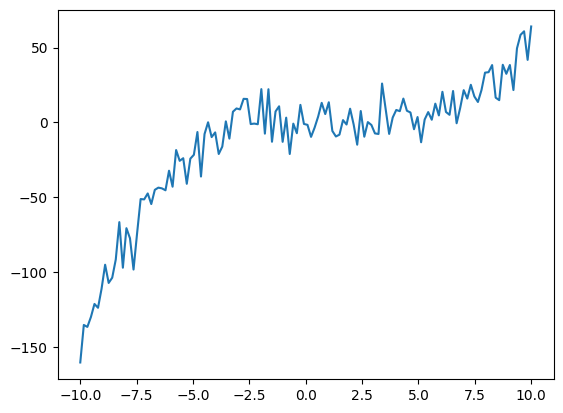

In [81]:
# -------------------- Task 1: Generate a Complex Non-linear Dataset --------------------
def generate_complex_data(n_samples=5000, include_noise=False):
    """
    Task 1: Implement the function to generate a complex non-linear dataset.

    Description:
    Generate a dataset based on a non-linear function with added noise.
    The function is defined as: y = 0.1x^3 - 0.5x^2 + 0.2x + 3 + sin(2x) + noise

    Args:
        n_samples: Number of samples to generate.

    Returns:
        X: Input feature array (n_samples,)
        y: Target values (n_samples,)
    """
    
    # Generate X values
    X = np.linspace(-10, 10, n_samples)
    
    # Calculate y values with added noise
    y = (0.1 * X**3) - (0.5 * X**2) + (0.2 * X + 3) + np.sin(2 * X)
    
    if include_noise: 
        noise = np.random.normal(0, 10, n_samples) # Generate noise randomly from gaussian distribution
        y += noise 
    
    return X, y

# Prepare the dataset
X, y = generate_complex_data(n_samples=128, include_noise=True)
X = X.reshape(-1, 1)  # Reshape X to a 2D array
y = y.reshape(-1, 1)  # Reshape y to a 2D array

_, y_test = generate_complex_data(n_samples=128, include_noise=False)
y_test = y_test.reshape(-1, 1)

plt.plot(X, y)
plt.show()

In [71]:
# -------------------- Neural Network Class Definition --------------------
class TwoLayerMLP:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        """
        Task 4: Initialize the neural network parameters (weights and biases).

        Description:
        Define and initialize weights and biases for three layers:
            1. Input to Hidden Layer 1
            2. Hidden Layer 1 to Hidden Layer 2
            3. Hidden Layer 2 to Output

        Args:
            input_size: Number of input features.
            hidden1_size: Number of neurons in the first hidden layer.
            hidden2_size: Number of neurons in the second hidden layer.
            output_size: Number of output neurons.
        """
        # TODO: Initialize weights and biases with appropriate dimensions
        self.W1 = np.random.uniform(-0.01, 0.01, size=(input_size, hidden1_size))
        self.b1 = np.zeros(hidden1_size)

        self.W2 = np.random.uniform(-0.01, 0.01, size=(hidden1_size, hidden2_size))
        self.b2 = np.zeros(hidden2_size)

        self.W3 = np.random.uniform(-0.01, 0.01, size=(hidden2_size, output_size))
        self.b3 = np.zeros(output_size)

    def forward(self, X):
        """
        Task 5: Implement the forward propagation logic.

        Args:
            X: Input features.

        Returns:
            output: Final output of the network.
        """
        # TODO: Implement forward propagation logic for each layer
                
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)

        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = tanh(self.z2)

        self.z3 = np.dot(self.a2, self.W3) + self.b3
        output = self.z3

        return output

    def backward(self, X, y, output, lr=0.0005):
        """
        Task 6: Implement backpropagation to calculate gradients and update weights.

        Args:
            X: Input features.
            y: Ground truth target values.
            output: Network predictions.
            lr: Learning rate.
        """
        
        output_error = output - y
                
        # Gradients for W3 and b3
        dW3 = np.dot(self.a2.T, output_error)
        db3 = output_error.sum(axis=0)

        # Error propagated to hidden layer 2
        a2_error = np.dot(output_error, self.W3.T) * tanh_derivative(self.z2)

        # Gradients for W2 and b2
        dW2 = np.dot(self.a1.T, a2_error)
        db2 = a2_error.sum(axis=0)

        # Error propagated to hidden layer 1
        a1_error = np.dot(a2_error, self.W2.T) * relu_derivative(self.z1)

        # Gradients for W1 and b1
        dW1 = np.dot(X.T, a1_error)
        db1 = a1_error.sum(axis=0)
        
        # Update weights and biases
        self.W3 -= lr * dW3
        self.b3 -= lr * db3
        self.W2 -= lr * dW2
        self.b2 -= lr * db2
        self.W1 -= lr * dW1
        self.b1 -= lr * db1

    def train(self, X, y, epochs=5000, lr=0.0005, batch_size=64):
        """
        Task 7: Implement the training process using mini-batch gradient descent.

        Args:
            X: Input features.
            y: Ground truth target values.
            epochs: Number of training epochs.
            lr: Learning rate.
            batch_size: Size of each mini-batch.

        Returns:
            loss_history: List of training loss values over epochs.
        """
        
        self.train_loss_history, self.test_loss_history = [], []
        num_samples = len(X)

        start_time = time.time()  # Start measuring time

        for epoch in range(epochs):
            # Generate a randomly shuffled array
            indices = np.random.permutation(num_samples)
            
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            epoch_train_loss = 0 
            epoch_test_loss = 0 
                        
            # TODO: Divide the data into mini-batches and perform forward and backward propagation
            for i in range(0, num_samples, batch_size):
                X_batch = X_shuffled[batch_size:]  # Extract mini-batch for X
                y_batch = y_shuffled[batch_size:]  # Extract mini-batch for y
                
                output = self.forward(X_batch)  # Replace with forward pass for mini-batch
                
                batch_train_loss = mse_loss(y_batch, output)  # Replace with loss calculation for mini-batch
                epoch_train_loss += batch_train_loss 
                
                # Perform backpropagation                
                self.backward(X_batch, y_batch, output, lr)

            # Calculate and store loss for the entire training set
            self.train_loss_history.append(epoch_train_loss)
            
            test_output = self.forward(X)
            epoch_test_loss = mse_loss(y_test, test_output) 
            
            # Calculate and store loss for the entire test set
            self.test_loss_history.append(epoch_test_loss)
            
            # Print training and test loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Training Loss: {epoch_train_loss:.4f}, Test Loss: {epoch_test_loss:.4f}')

            # Stop if training time exceeds 1 minute
            if time.time() - start_time > 60:
                print(f"Stopping training early at epoch {epoch} due to time constraints.")
                break

        return loss_history

    def predict(self, X):
        """
        Task 8: Implement the prediction logic using the trained model.

        Args:
            X: Input features.

        Returns:
            output: Predictions of the network.
        """
        # TODO: Implement the prediction using the forward pass
        return self.forward(X)

In [64]:
# -------------------- Activation Functions and Their Derivatives --------------------
def relu(x):
    """
    Task 2: Implement the ReLU activation function.
    """
    # TODO: Implement ReLU activation function
    
    relu = np.maximum(0, x)
    
    return relu


def relu_derivative(x):
    """
    Task 2: Implement the derivative of the ReLU activation function.
    """
    # TODO: Implement ReLU derivative
    
    activation_output = relu(x)
    derivative = np.where(activation_output == x, 1, 0)
    
    return derivative 

def tanh(x):
    """
    Task 2: Implement the Tanh activation function.
    """
    
    return np.tanh(x)


def tanh_derivative(x):
    """
    Task 2: Implement the derivative of the Tanh activation function.
    """

    return 1 - (tanh(x) ** 2)


def weighted_sum(inputs, weights, bias): 
    """
    Computes the weighted sum of inputs, weights, and bias terms
    """
    
    return np.dot(inputs, weights) + bias 

In [65]:
# -------------------- Mean Squared Error Loss Function --------------------
def mse_loss(y_true, y_pred):
    """
    Task 3: Implement the Mean Squared Error (MSE) loss function.

    Args:
        y_true: Ground truth values.
        y_pred: Predicted values.

    Returns:
        loss: Computed mean squared error.
    """
    
    mse = np.mean((y_true - y_pred)**2)
    
    return mse 

Epoch 0, Training Loss: 4090.5594, Test Loss: 1979.2953
Epoch 100, Training Loss: 2348.3571, Test Loss: 1055.1751
Epoch 200, Training Loss: 2335.0304, Test Loss: 1075.2655
Epoch 300, Training Loss: 2444.5318, Test Loss: 1070.1362
Epoch 400, Training Loss: 1894.3871, Test Loss: 1071.4658
Epoch 500, Training Loss: 2412.2491, Test Loss: 1072.5464
Epoch 600, Training Loss: 1832.9575, Test Loss: 1079.7045
Epoch 700, Training Loss: 2039.5913, Test Loss: 1087.8529
Epoch 800, Training Loss: 1871.7892, Test Loss: 1080.8655
Epoch 900, Training Loss: 2647.3111, Test Loss: 1090.5287
Epoch 1000, Training Loss: 2187.8051, Test Loss: 1090.7988
Epoch 1100, Training Loss: 2085.8839, Test Loss: 1071.1268
Epoch 1200, Training Loss: 2246.4177, Test Loss: 1132.4957
Epoch 1300, Training Loss: 2054.2977, Test Loss: 1094.8341
Epoch 1400, Training Loss: 2404.7662, Test Loss: 1082.3648
Epoch 1500, Training Loss: 2285.1738, Test Loss: 1078.3637
Epoch 1600, Training Loss: 1815.1967, Test Loss: 1079.8372
Epoch 170

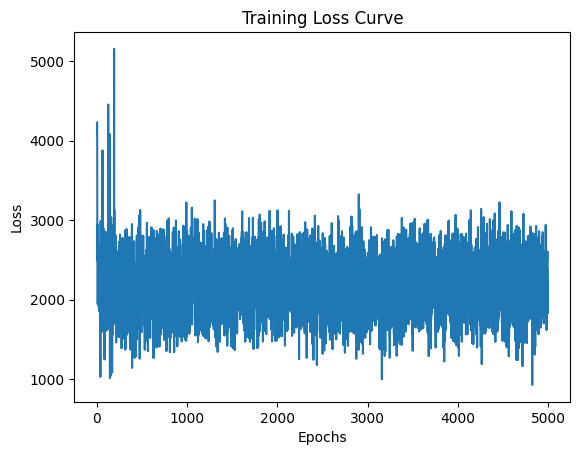

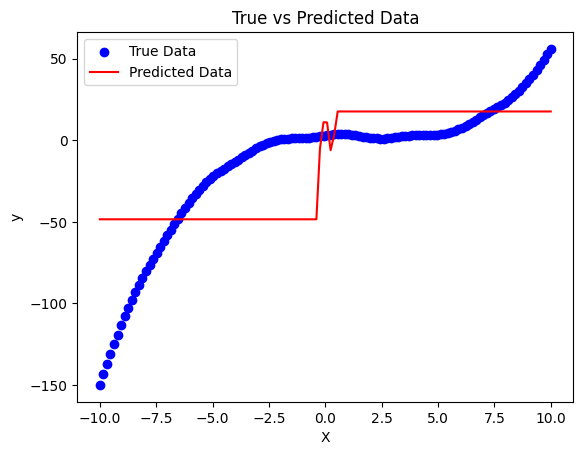

In [76]:
# -------------------- Task 9: Data Preparation and Model Training --------------------

# # Create and train the model
model = TwoLayerMLP(input_size=1, hidden1_size=128, hidden2_size=64, output_size=1)
loss_history = model.train(X, y, epochs=5000, lr=0.0005, batch_size=64)

# # -------------------- Task 10: Visualization of Training Results --------------------
# TODO: Plot the training loss over epochs using matplotlib
plt.plot(range(0, 5000), model.train_loss_history)  # Replace with correct variable for loss history
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# # -------------------- Task 11: Model Prediction and Visualization --------------------
# TODO: Use the trained model to predict and visualize results
y_pred = model.predict(X)  # Replace with appropriate prediction

# TODO: Plot the true data points and model predictions using matplotlib
plt.scatter(X, y_test, label='True Data', color='blue')  # Replace with true data
plt.plot(X, y_pred, color='red', label='Predicted Data')  # Replace with predicted data
plt.title("True vs Predicted Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

The model is great, it has a kind spirit and I would definitely trust it with only the most important predictive tasks. In all seriousness, I do believe there is a bit of an error somewhere in the backpropagation algorithm causing it to not learn the nonlinear pattern of the dataset. 

In [84]:
# Prepare the dataset
X, y = generate_complex_data(n_samples=128, include_noise=True)
X = X.reshape(-1, 1)  # Reshape X to a 2D array
y = y.reshape(-1, 1)  # Reshape y to a 2D array

_, y_test = generate_complex_data(n_samples=128, include_noise=False)
y_test = y_test.reshape(-1, 1)

Epoch 0, Training Loss: 17279.9809, Test Loss: 2002.0965
Epoch 100, Training Loss: 11826.6247, Test Loss: 1283.7470
Epoch 200, Training Loss: 3387.6587, Test Loss: 392.9652
Epoch 300, Training Loss: 2296.6222, Test Loss: 217.5932
Epoch 400, Training Loss: 1422.2355, Test Loss: 147.8332
Epoch 500, Training Loss: 1298.2988, Test Loss: 84.7788
Epoch 600, Training Loss: 1034.9353, Test Loss: 62.1321
Epoch 700, Training Loss: 903.7000, Test Loss: 63.2887
Epoch 800, Training Loss: 878.1941, Test Loss: 58.0650
Epoch 900, Training Loss: 711.0222, Test Loss: 30.8892
Epoch 1000, Training Loss: 814.6651, Test Loss: 58.2824
Epoch 1100, Training Loss: 836.6999, Test Loss: 48.9512
Epoch 1200, Training Loss: 699.9948, Test Loss: 20.5789
Epoch 1300, Training Loss: 676.0588, Test Loss: 22.8879
Epoch 1400, Training Loss: 724.5383, Test Loss: 24.5885
Epoch 1500, Training Loss: 699.0358, Test Loss: 28.9459
Epoch 1600, Training Loss: 716.0831, Test Loss: 22.0935
Epoch 1700, Training Loss: 662.6643, Test Lo

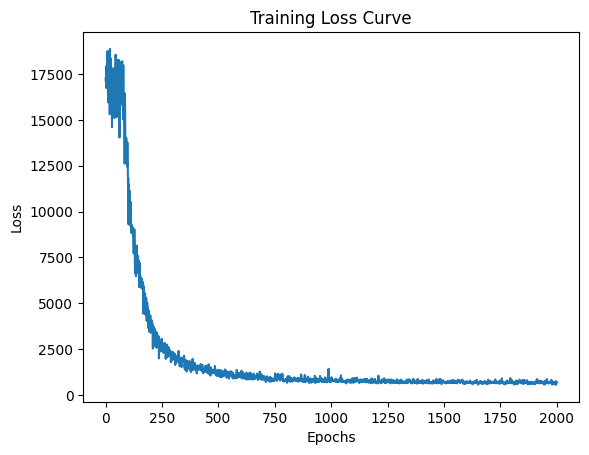

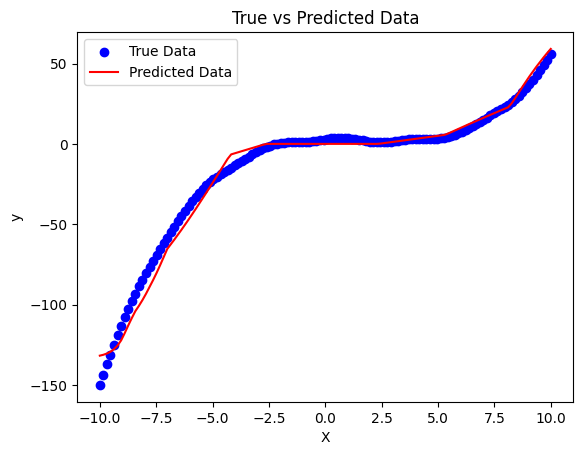

In [90]:
# -------------------- Task 9: Data Preparation and Model Training --------------------

# # Create and train the model
model = TwoLayerMLP(input_size=1, hidden1_size=32, hidden2_size=16, output_size=1)
loss_history = model.train(X, y, epochs=2_000, lr=0.000003, batch_size=16)

# # -------------------- Task 10: Visualization of Training Results --------------------
# TODO: Plot the training loss over epochs using matplotlib
plt.plot(range(0, 2_000), model.train_loss_history)  # Replace with correct variable for loss history
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# # -------------------- Task 11: Model Prediction and Visualization --------------------
# TODO: Use the trained model to predict and visualize results
y_pred = model.predict(X)  # Replace with appropriate prediction

# TODO: Plot the true data points and model predictions using matplotlib
plt.scatter(X, y_test, label='True Data', color='blue')  # Replace with true data
plt.plot(X, y_pred, color='red', label='Predicted Data')  # Replace with predicted data
plt.title("True vs Predicted Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()